# 📌Introduction and Table of Contents
This notebook explores the Online Shoppers' Intention dataset, focusing on how factors like page value and browsing duration influence purchasing behavior. Through a mix of visualizations and a basic predictive model, we aim to uncover actionable insights. If you find this analysis helpful, feel free to upvote!

# Table of Contents
- [Data Loading](#data-loading)
- [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Correlation and Heatmap](#correlation-and-heatmap)
- [Visualizations](#visualizations)
- [Prediction Model](#prediction-model)
- [Model Evaluation](#model-evaluation)
- [Conclusion](#conclusion)

## Data Loading <a id="data-cleaning-and-preprocessing"></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

url = r"C:\Users\agiX\Downloads\online_shoppers_intention.csv"
df = pd.read_csv(url)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## 🧹 Data Cleaning and Preprocessing <a id="data-cleaning-and-preprocessing"></a>
We start by inspecting the structure and data types of each column, ensuring consistency with the dataset documentation. Data types are converted where necessary, and potential issues such as missing or invalid entries are addressed to prepare for analysis.

In [3]:
print('Data types before conversion:')
print(df.dtypes)

if df['Weekend'].dtype != 'bool':
    df['Weekend'] = df['Weekend'].astype(bool)

if df['Revenue'].dtype != 'bool':
    df['Revenue'] = df['Revenue'].astype(bool)

missing_values = df.isnull().sum()
print('\nMissing values in each column:')
print(missing_values)


Data types before conversion:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Missing values in each column:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Mont

In [4]:
df.head()
df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [5]:
aggregated_df = df.groupby(by="TrafficType", as_index=False)\
    .agg(
        ProductRelated =("ProductRelated", "mean"),
        BounceRates = ("BounceRates", "mean"),
        Informational = ("Informational", "mean"),
        InformationalDuration = ("Informational_Duration", "mean"),
        ProductRelatedDuration = ("ProductRelated_Duration", "mean")
    )

aggregated_df

,TrafficType,ProductRelated,BounceRates,Informational,InformationalDuration,ProductRelatedDuration
0,1,31.918401,0.032346,0.375765,23.419545,1234.034177
1,2,38.125224,0.008455,0.739330,55.076869,1457.941637
2,3,25.805556,0.033314,0.300195,19.342099,892.757712
3,4,28.525725,0.016261,0.498597,30.614188,988.944497
4,5,17.884615,0.009451,0.473077,19.156346,742.331026
5,6,29.608108,0.022103,0.452703,29.027324,1140.418002
6,7,29.175000,0.007822,0.525000,30.247500,1035.012620
7,8,26.122449,0.011499,0.498542,41.262335,1084.488987
8,9,14.738095,0.026341,0.333333,35.464286,541.791785
9,10,32.888889,0.016633,0.526667,30.403574,1258.305854


## 🔍 Exploratory Data Analysis <a id="exploratory-data-analysis"></a>

In this section, we delve into the dataset using descriptive statistics and visual exploration. We utilize distribution plots for continuous features and count plots for categorical variables to uncover patterns, trends, and potential anomalies in the data.

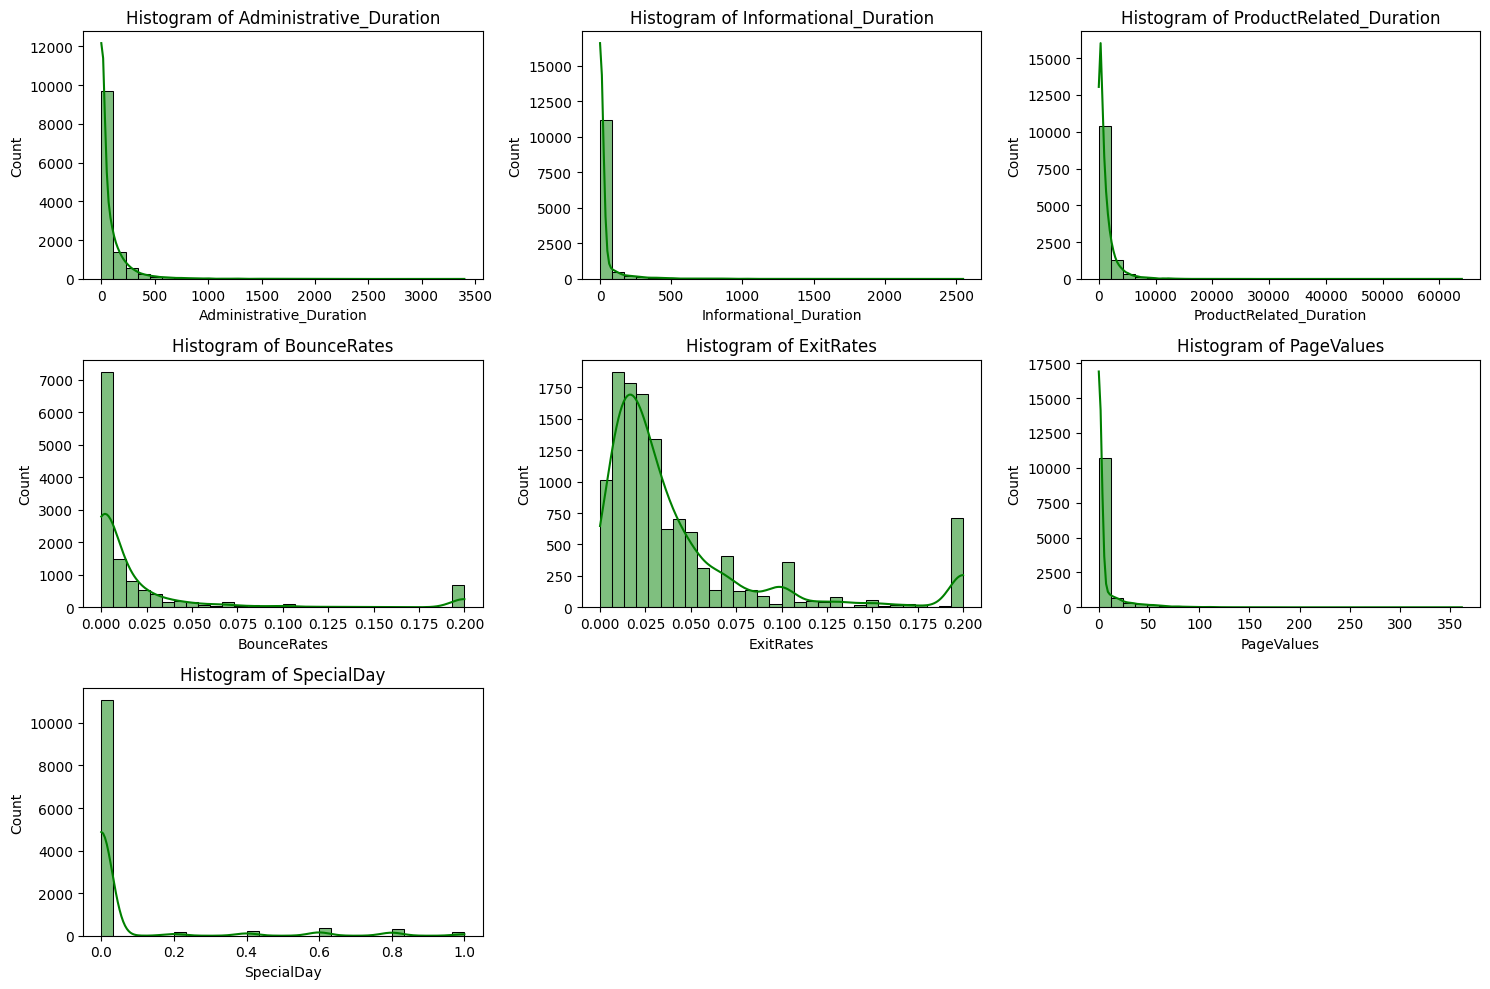

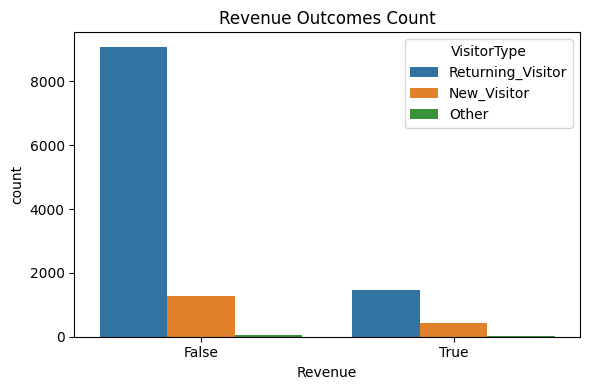

In [7]:
columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 
            'ExitRates', 'PageValues', 'SpecialDay']

plt.figure(figsize = (15,10))
for i,col in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.histplot(data=df[col], kde=True, bins=30, color='green')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize = (6,4))
sns.countplot(data=df,x="Revenue", hue="VisitorType")
plt.title("Revenue Outcomes Count")
plt.tight_layout()
plt.show()


# 🔗 Correlation and Heatmap <a id="correlation-and-heatmap"></a>
Here, we compute a correlation matrix for all numerical features to assess how they relate to one another. A heatmap helps visualize these correlations, revealing patterns such as strong positive or negative relationships, or multicollinearity among variables.

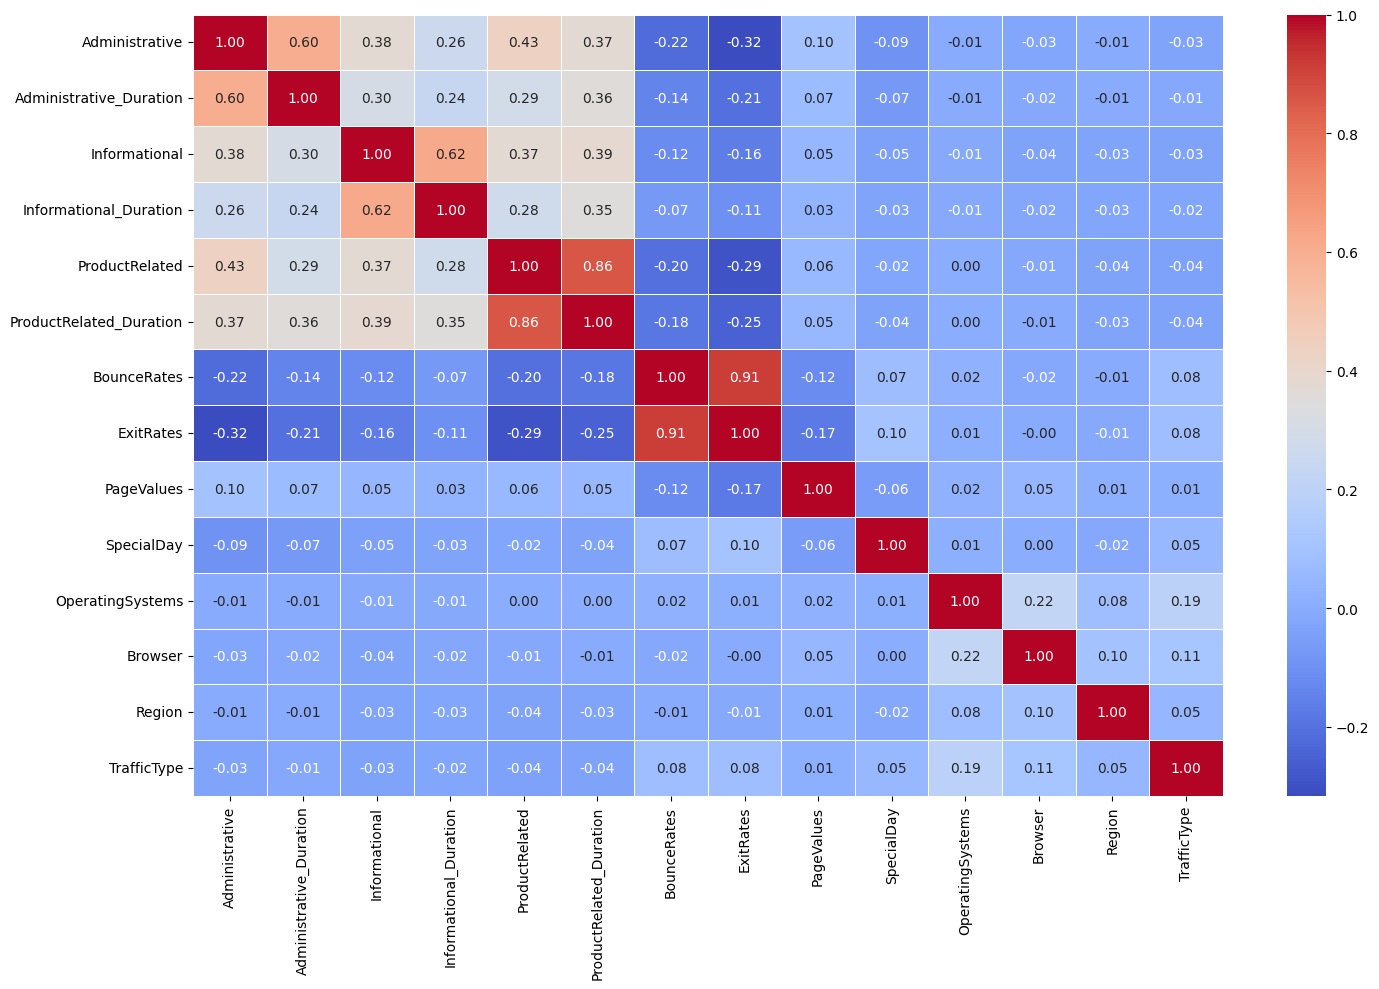

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4: # the [1] is the column and [0] is row cause the numeric_df.shape is row at [0],[1] column
    plt.figure(figsize=(15,10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5) #annot - annoates each square with value
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# 📊 Visualizations <a id="visualizations"></a>
In this section, we dive into various visual techniques to understand trends and patterns in the dataset. These include:

-Histograms to view distributions

-Box plots and violin plots to examine spread and outliers

-Grouped bar plots to explore relationships between categories and numerical values



C:\Users\agiX\AppData\Local\Temp\ipykernel_49788\3565848931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ProductRelated', y='PageValues', data=df, palette='Set3')


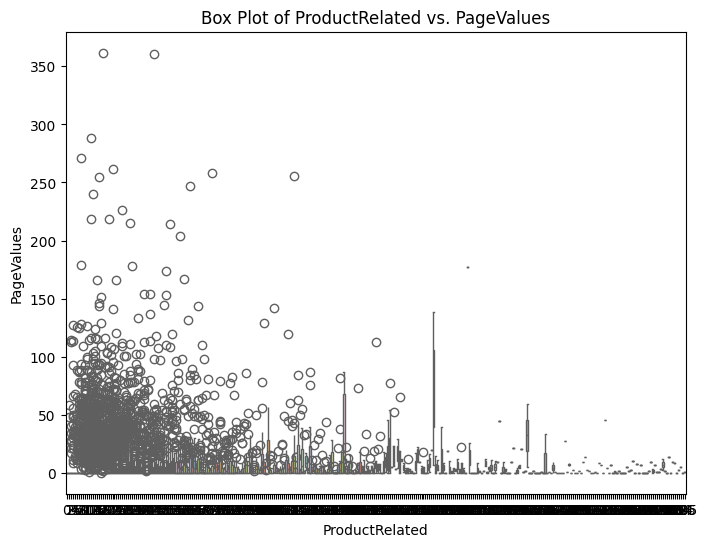

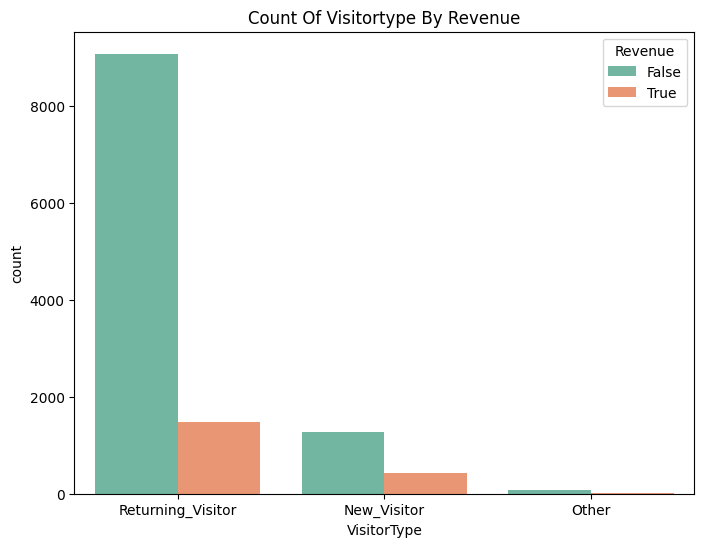

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ProductRelated', y='PageValues', data=df, palette='Set3')
plt.title('Box Plot of ProductRelated vs. PageValues')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='VisitorType', data=df, hue="Revenue", palette="Set2")
plt.title('Count Of Visitortype By Revenue')
plt.show()

## 🤖 Prediction Model <a id="prediction-model"></a>

In [ ]:
df_model=df.copy()

categorical_cols = ['Month', 'VisitorType']
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

df_model['Weekend'] = df_model['Weekend'].astype(int)
df_model['Revenue'] = df_model['Revenue'].astype(int)

X = df_model.drop("Revenue", axis=1)
y = df_model["Revenue"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

c:\Users\agiX\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ✅ Model Evaluation <a id="model-evaluation"></a>

Let us now evaluate our logistic regression model. We will calculate the accuracy score, visualize the confusion matrix, and plot the ROC curve. These steps aid in understanding the model's performance, and any encountered issues during development are explained through comments.

Accuracy Score: 0.8836


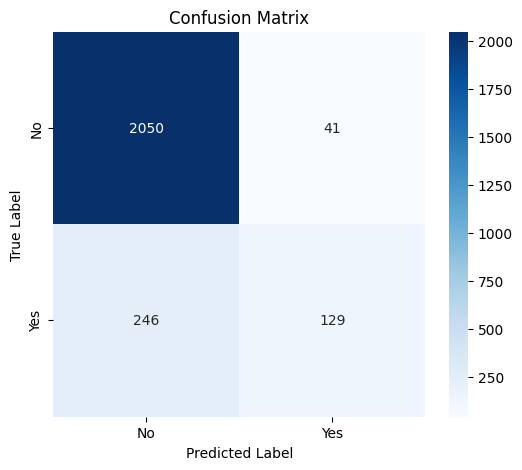

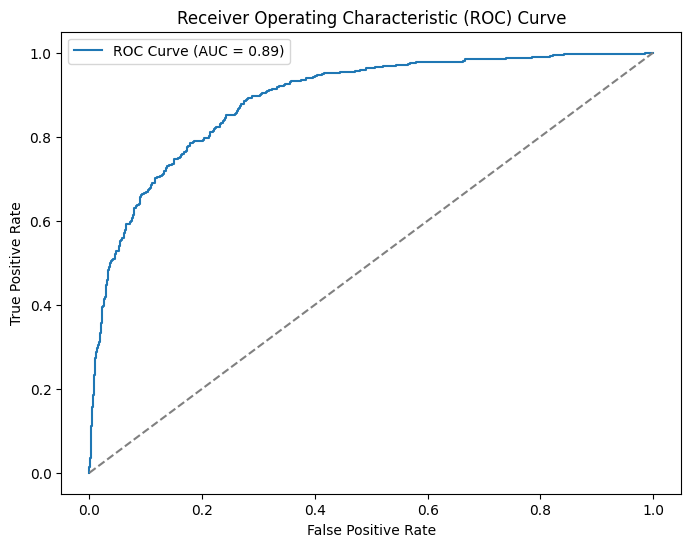

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.4f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

y_probs = model.predict_proba(X_test)[:, 1]  # probs of being class 1
# fpr = false positive rate, tpr = true positive rate, thresholds = cutoff for "yes" or "no"
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## 🏁 Conclusion <a id="conclusion"></a>

This notebook offered a comprehensive analysis of the Online Shoppers Intention dataset. We used visual tools such as histograms, heatmaps, and violin plots to explore data distributions and relationships. To assess predictive potential, a logistic regression model was developed as a baseline for forecasting revenue outcomes, yielding a quantifiable accuracy score.
